# <font color='#2F4F4F'>AfterWork Data Science: Recurrent Neural Networks with Python - Project</font>

## <font color='#2F4F4F'>Step 1. Business Understanding </font>

### a) Specifying the Research Question

Build a recurrent neural networks model that will be used to predict Tesla stock prices in 2017 using data from 2012-2016

### b) Defining the Metric for Success

Build a neural networks regression model with an RSME  less than 10% of the target mean.

### c) Understanding the Context 

Stockpy is an innovative fintech enabling financial prosperity for the entire population. It is a venture funded startup based in Palo Alto bringing world-class financial experiences to a continually growing customer base. As Stockpy enters an expansion phase for innovative fintech product offerings, it aims to enhance the enormous value in data processing and analysis for continuous growth and success.

As a Finance Data Scientist for Stockpy, you provide leadership to turn cutting-edge technology into actionable insights; unlocking the power of data that provides value to business decisions and customer service enhancements.

### d) Recording the Experimental Design

* Business Understanding
* Data Exploration
* Data Preparation
* Data Modeling and Evaluation
* Summary of Findings and Recommendation
* Challenging the Solution


## <font color='#2F4F4F'>Step 2. Data Importation</font>

In [34]:
# Importing standard libraries
# ---
# 
import pandas as pd               # library for data manipulation
import numpy as np                # library for scientific computations
import matplotlib.pyplot as plt   # library for data visualisation 

In [56]:
# Importing train dataset
# ---
#
train_df =pd.read_csv('https://bit.ly/38dSbSb')
train_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,5.788,5.900,5.530,5.616,5.616,4640500
1,2012-01-04,5.642,5.734,5.500,5.542,5.542,3150500
2,2012-01-05,5.552,5.586,5.370,5.424,5.424,5027500
3,2012-01-06,5.440,5.558,5.282,5.382,5.382,4931500
4,2012-01-09,5.400,5.498,5.224,5.450,5.450,4485000


In [57]:
# Importing test dataset
# ---
#
test_set =pd.read_csv('https://bit.ly/38dSbSb')
test_set.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,5.788,5.900,5.530,5.616,5.616,4640500
1,2012-01-04,5.642,5.734,5.500,5.542,5.542,3150500
2,2012-01-05,5.552,5.586,5.370,5.424,5.424,5027500
3,2012-01-06,5.440,5.558,5.282,5.382,5.382,4931500
4,2012-01-09,5.400,5.498,5.224,5.450,5.450,4485000


## <font color='#2F4F4F'>Step 3. Data Exploration</font>

In [37]:
# Sample dataset
# ---
#
train_df.sample(10)

,Date,Open,High,Low,Close,Adj Close,Volume
882,2015-07-08,51.863998,52.160000,50.862000,50.992001,50.992001,31105500
906,2015-08-11,47.430000,47.860001,46.888000,47.473999,47.473999,21324500
1202,2016-10-12,40.189999,40.776001,40.084000,40.301998,40.301998,9853500
995,2015-12-16,44.419998,46.976002,44.146000,46.902000,46.902000,25521500
782,2015-02-12,38.714001,40.618000,38.655998,40.576000,40.576000,78248000
823,2015-04-14,41.714001,41.897999,41.099998,41.492001,41.492001,15130000
167,2012-08-30,5.720000,5.748000,5.620000,5.682000,5.682000,3282000
988,2015-12-07,45.540001,47.125999,45.230000,46.226002,46.226002,15721000
998,2015-12-21,46.338001,47.166000,46.216000,46.512001,46.512001,9766000
949,2015-10-12,44.598000,44.599998,43.054001,43.116001,43.116001,19181500


In [38]:
# Statistical summary
# ---
#
train_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,31.997898,32.558671,31.403696,31.989245,31.989245,2.551310e+07
std,16.911515,17.148543,16.649245,16.903500,16.903500,2.259037e+07
min,5.324000,5.370000,4.528000,4.558000,4.558000,1.824500e+06
25%,8.403000,8.556000,8.197000,8.379500,8.379500,1.059400e+07
50%,39.411000,40.123998,38.709000,39.427000,39.427000,2.007650e+07
75%,45.214499,45.934999,44.303000,45.076502,45.076502,3.245150e+07
max,57.534000,58.284000,56.080002,57.208000,57.208000,1.858195e+08


## <font color='#2F4F4F'>Step 4. Data Preparation</font>

In [60]:
# Getting our train dataset
# ---
#we are interested in stock prices in 2017 using data from 2012-2016 therefore our in train set data will be the opening price
train_set = train_df.iloc[:,1:2].values
train_set

array([[ 5.788   ],
       [ 5.642   ],
       [ 5.552   ],
       ...,
       [44.306   ],
       [43.712002],
       [43.259998]])

In [61]:
# Performing Feature scaling
# ---
#
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
train_set_scaled = sc.fit_transform(train_set)
train_set_scaled

array([[0.00888719],
       [0.00609079],
       [0.00436698],
       ...,
       [0.74663857],
       [0.73526148],
       [0.72660406]])

In [62]:
# Creating a dataset with 60 timesteps and 1 output
# ---
#
# ---
# A special data structure is needed to cover 60-time stamps, based on which RNN will predict the 61st price. 
# The number of past timestamps is set to 60 based on experimentation.
# Thus, X_train is a nested list, which contains lists of 60 time-stamp prices. 
# y_train is a list of stock prices which is the next day stock price, corresponding to each list in X_train.
# ---
#
X_train = []
y_train = []
for i in range(60, len(train_df)):
    X_train.append(train_set_scaled[i-60:i, 0])
    y_train.append(train_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [63]:
# Reshaping 
# ---
#
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [64]:
X_train.shape

(1198, 60, 1)

##  <font color='#2F4F4F'>Step 5. Data Modeling</font>

In [43]:
# Building the RNN
# ---
#
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


In [65]:
# Initialising the RNN
# ---
#
regressor = Sequential()

# Adding 4 LSTM layers and some Dropout regularisation

# 'units' is the number of LSTM neurons in the layer
# 'return_sequences' is True as we need to add another LSTM layer after the current one.
# 'input_shape' corresponds to the number of time stamps and the number of indicators.
#  For 'Dropout', 20% of 50 neurons will be ignored randomly during each iteration of training.
# ---
# Adding the first LSTM layer and some Dropout regularisation

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))



# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
# 'return_sequences' is False as we will not add more LSTM layers after this one.
regressor.add(LSTM(units = 50, return_sequences = False))
regressor.add(Dropout(0.2))


# Adding the output layer
# 'output dimension' is 1 since we are predicting 1 price each time.
regressor.add(Dense(units = 1))

In [66]:
# Compile the RNN 
# ---
#
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])

In [68]:
# Fitting the RNN to the training set
# ---
#
regressor.fit(X_train, y_train, epochs = 200, batch_size = 32)
# model.fit(X_train, y_train, epochs = 200, batch_size = 32, validation_data = (X_test, y_test))

Epoch 1/200
38/38 [==============================] - 2s 66ms/step - loss: 0.0065 - accuracy: 8.3472e-04
Epoch 2/200
38/38 [==============================] - 2s 66ms/step - loss: 0.0065 - accuracy: 8.3472e-04
Epoch 3/200
38/38 [==============================] - 2s 62ms/step - loss: 0.0059 - accuracy: 8.3472e-04
Epoch 4/200
38/38 [==============================] - 2s 61ms/step - loss: 0.0053 - accuracy: 8.3472e-04
Epoch 5/200
38/38 [==============================] - 2s 61ms/step - loss: 0.0053 - accuracy: 8.3472e-04
Epoch 6/200
38/38 [==============================] - 2s 61ms/step - loss: 0.0054 - accuracy: 8.3472e-04
Epoch 7/200
38/38 [==============================] - 2s 60ms/step - loss: 0.0059 - accuracy: 8.3472e-04
Epoch 8/200
38/38 [==============================] - 2s 60ms/step - loss: 0.0054 - accuracy: 8.3472e-04
Epoch 9/200
38/38 [==============================] - 2s 61ms/step - loss: 0.0046 - accuracy: 8.3472e-04
Epoch 10/200
38/38 [==============================] - 2s 61ms/st

In [70]:
# Making predictions: Getting the predicted stock price for 2017
# ---
#
real_stock_price = test_set.iloc[:, 1:2].values
print(real_stock_price)


# ---
# We need to concatenate the train and test datasets for prediction, 
# because we use the previous 60 days' stock prices to predict the next-day price. 
# i.e. we need the 60 days' price before the 1st date in the test dataset.
# ---
#
dataset_total = pd.concat((train_df['Open'],test_set['Open']), axis=0)

# We create the input for prediction, index starting from the 
# date 60 days before the first date in the test dataset.
# ---
#
inputs = dataset_total[len(dataset_total)-len(test_set)-60:].values


# Reshaping the inputs to have only 1 column
# ---
#
inputs = inputs.reshape(-1, 1)


# Using the scale set by the training set to scale the test inputs
# ---
#
inputs = sc.transform(inputs)


# Then creating the test data structure just as we did for the train dataset

X_test = []
y_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
    y_test.append(inputs[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Making our Predictions
predicted_stock_price = regressor.predict(X_test)

# reversing the scaled values
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
print(predicted_stock_price)

[[ 5.788   ]
 [ 5.642   ]
 [ 5.552   ]
 ...
 [44.306   ]
 [43.712002]
 [43.259998]]
[[43.018   ]
 [29.293749]
 [19.670069]
 ...
 [42.432713]
 [43.703293]
 [43.416653]]


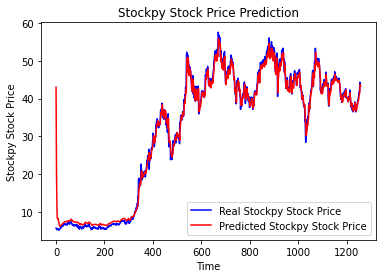

In [77]:
# Visualizing the results
plt.plot(real_stock_price, color = 'blue', label = 'Real Stockpy Stock Price')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted Stockpy Stock Price')
plt.title('Stockpy Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stockpy Stock Price')
plt.legend()
plt.show()

In [73]:
# Model Evaluation
# ---
#
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
print(rmse)

1.8231715040694545


In [76]:
# target mean=31.997898
perc_of_mean = 1.8231715040694545/31.997898
perc_of_mean

0.05697785223483913

## <font color='#2F4F4F'>Step 6. Summary of Findings and Recommendation</font>

Findings:

The predicted stock price does not differ much from the actual meaning our model is fairly accurate,
We achieved an RMSE 5.6% of the target mean.

Recommendation:
We can use RNN model to predict the stock prices farily acccurately


## <font color='#2F4F4F'>Step 7. Challenging our Solution</font>

#### a) Did we have the right question?
We had the right questions for our analysis

#### b) Did we have the right data?
We had the right data for our analysis

#### c) What can be done to improve the solution?
We can improve the performance of our model by adding more LSTM layers, increasng our training data and increasing the timesteps